# **Descriptive Statistics**
---
---

### **Setup & Load the Data**
---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [2]:
# Load a CSV file from your local file system
df = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/raw_analyst_ratings_cleaned.csv')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


---

### **1.Headline Length:**

Mean headline length: 92.03
Median headline length: 71.0
Standard deviation of headline length: 68.52


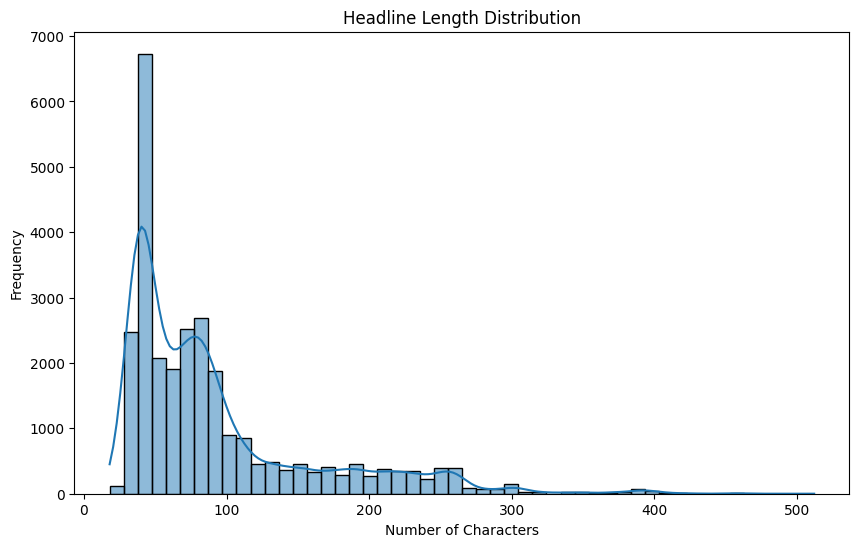

In [3]:
# Calculate descriptive statistics for headline length
headline_lengths = df['headline'].apply(lambda x: len(str(x)))
mean_length = headline_lengths.mean()
median_length = headline_lengths.median()
std_length = headline_lengths.std()

print(f"Mean headline length: {mean_length:.2f}")
print(f"Median headline length: {median_length}")
print(f"Standard deviation of headline length: {std_length:.2f}")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(headline_lengths, bins=50, kde=True)
plt.title('Headline Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

### **Summary of Headline Length Distribution**

- **Total Headlines Analyzed:** 28,392  
- **Mean Headline Length:** ~92 characters  
- **Median Headline Length:** 71 characters  
- **Standard Deviation:** ~69 characters  

The distribution of headline lengths is right-skewed, with most headlines falling between 40 and 100 characters. The mean is higher than the median, indicating the presence of some unusually long headlines. Most headlines are concise, but a small number of outliers increase the average length.

---


### **Articles per Publisher:**

Top 10 publishers by article count:
publisher
Benzinga Newsdesk          8842
Lisa Levin                 7735
Benzinga Newsdesk          3177
Benzinga Insights          2332
Vick Meyer                 1946
Benzinga_Newsdesk           933
vishwanath@benzinga.com     924
Shanthi Rexaline            637
Charles Gross               327
ETF Professor               205
Name: count, dtype: int64


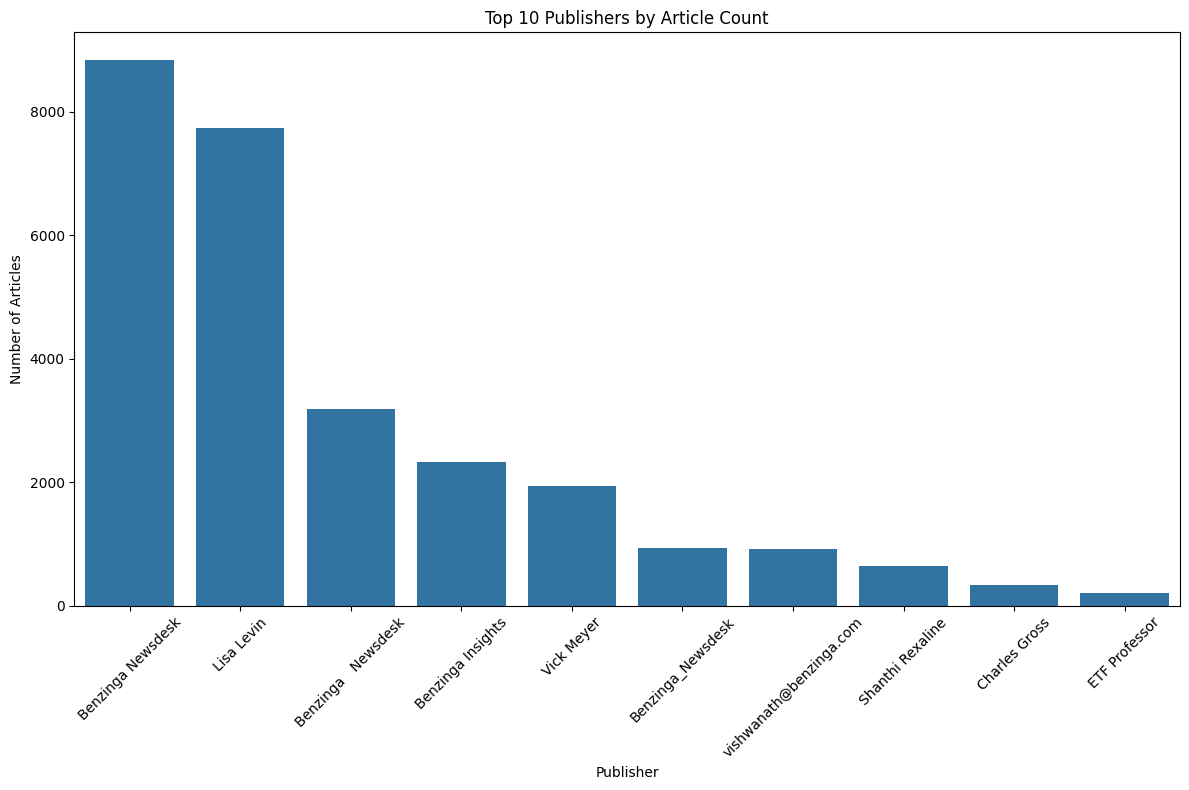

In [4]:
# Count the number of articles per publisher
articles_per_publisher = df['publisher'].value_counts()

# Display the top 10 publishers
print("Top 10 publishers by article count:")
print(articles_per_publisher.head(10))

# Plot the number of articles per publisher
plt.figure(figsize=(12, 8))
sns.barplot(x=articles_per_publisher.head(10).index, y=articles_per_publisher.head(10).values)
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Summary of Top 10 Publishers by Article Count**

- The dataset contains articles from a wide range of publishers, with a total of 61 unique publishers represented.
- The top 10 publishers account for a substantial portion of the total articles, indicating a concentration of news coverage among a few sources.
- **Benzinga Newsdesk** leads with 8,842 articles, followed by **Lisa Levin** (7,735 articles) and **Benzinga Newsdesk** (3,177 articles).
- Other notable contributors include **Benzinga Insights** (2,332 articles) and **Vick Meyer** (1,946 articles).
- The distribution shows a steep drop after the top few publishers, with most others contributing far fewer articles.
- This concentration suggests that analyses of trends or sentiment may be heavily influenced by the editorial practices of these top publishers.
- Understanding publisher distribution is important for assessing potential biases and coverage diversity in the dataset.
----

### **Publication Date Trends:**

Daily publication counts (first 5):
date
2020-01-01     1
2020-01-02    13
2020-01-03    21
2020-01-05     2
2020-01-06    35
Name: count, dtype: int64

Weekly publication counts (first 5):
date
2019-12-30/2020-01-05     37
2020-01-06/2020-01-12    210
2020-01-13/2020-01-19    272
2020-01-20/2020-01-26    452
2020-01-27/2020-02-02    446
Freq: W-SUN, Name: count, dtype: int64

Monthly publication counts (first 5):
date
2020-01    1417
2020-02    2355
2020-03    4681
2020-04    4616
2020-05    9333
Freq: M, Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_14072\1442701969.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  weekly_counts = df['date'].dt.to_period('W').value_counts().sort_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_14072\1442701969.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = df['date'].dt.to_period('M').value_counts().sort_index()


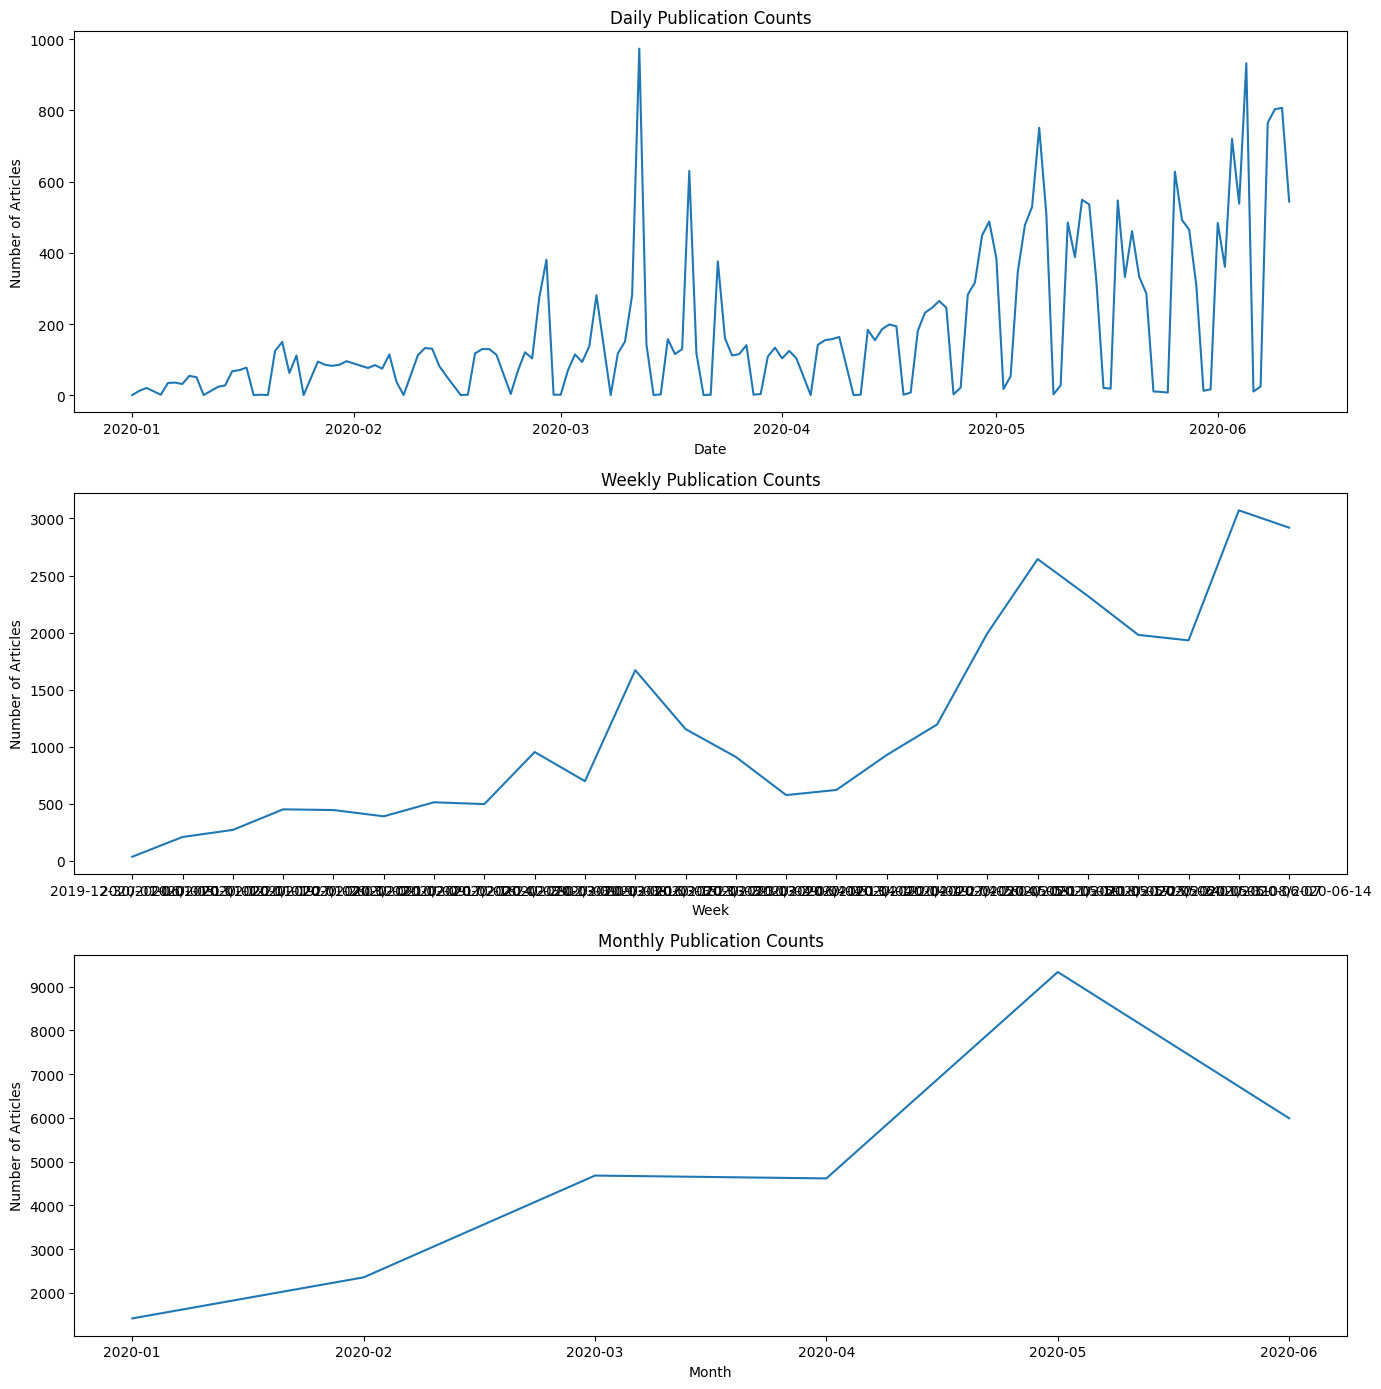

In [5]:
# Convert 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'])

# Daily publication counts
daily_counts = df['date'].dt.date.value_counts().sort_index()
print("Daily publication counts (first 5):")
print(daily_counts.head())

# Weekly publication counts
weekly_counts = df['date'].dt.to_period('W').value_counts().sort_index()
print("\nWeekly publication counts (first 5):")
print(weekly_counts.head())

# Monthly publication counts
monthly_counts = df['date'].dt.to_period('M').value_counts().sort_index()
print("\nMonthly publication counts (first 5):")
print(monthly_counts.head())

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(14, 14))

# Daily
axs[0].plot(daily_counts.index, daily_counts.values)
axs[0].set_title('Daily Publication Counts')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Articles')

# Weekly
axs[1].plot(weekly_counts.index.astype(str), weekly_counts.values)
axs[1].set_title('Weekly Publication Counts')
axs[1].set_xlabel('Week')
axs[1].set_ylabel('Number of Articles')

# Monthly
axs[2].plot(monthly_counts.index.astype(str), monthly_counts.values)
axs[2].set_title('Monthly Publication Counts')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Number of Articles')

plt.tight_layout()
plt.show()

### **Summary of Publication Date Trends**

- **Temporal Coverage:** The dataset spans from January 2020 to June 2020, covering approximately six months of financial news articles.
- **Daily Trends:** Daily publication counts vary widely, with some days having as few as 1 article and others exceeding 800 articles, especially in June 2020.
- **Weekly & Monthly Patterns:** There is a clear upward trend in article volume over time, with notable spikes in March, May, and June 2020, likely corresponding to major market events or increased news activity.
- **Growth Over Time:** The number of articles published per month increased substantially, peaking in May 2020 (9,333 articles) and remaining high in June 2020 (5,990 articles).
- **Seasonality & Outliers:** Occasional dips and peaks suggest responses to specific financial events or market volatility. Lower counts may also reflect weekends or holidays.
- **Implications:** Understanding these trends is crucial for time series analysis, as changes in publication frequency can impact downstream analyses such as sentiment tracking or event studies.